In [4]:
from google.colab import drive

In [5]:
# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
# Now you can access your file using its relative path
file_path = '/content/drive/My Drive/MachineLearning_Group/Project/Python_Code_project/SolarIrradiance_processed.csv'

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Reading in  data
solar_ir_df = pd.read_csv(file_path)

In [12]:
solar_ir_df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1314720.0,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06
mean,2.020000e+03,6.523549e+00,1.572782e+01,1.150000e+01,30.0,1.569358e+01,4.366212e+01,3.581658e+02,2.483008e+02,1.533958e+00,8.382243e+00,5.261429e+01,2.918992e+02,2.241401e+02,6.802095e+01,8.968456e+01,1.014349e+03,1.553625e+00,1.924700e+00,9.512833e+04
std,1.413827e+00,3.448534e+00,8.799328e+00,6.922189e+00,0.0,6.715500e+00,5.266085e+01,3.912259e+02,3.228307e+02,2.725400e+00,3.899133e+00,7.183775e+01,3.681441e+02,3.088930e+02,2.424006e+01,3.748750e+01,1.045495e+01,6.718073e-01,1.015036e+00,1.508937e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,30.0,-2.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.820000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+00,1.444000e+01,9.590000e+02,2.000000e-01,1.000000e-01,9.511000e+04
25%,2.019000e+03,4.000000e+00,8.000000e+00,5.750000e+00,30.0,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.916000e+01,6.008000e+01,1.012000e+03,1.100000e+00,1.100000e+00,9.511900e+04
50%,2.020000e+03,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.440000e+01,1.000000e+01,6.100000e+01,1.100000e+01,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,8.000000e+00,7.340000e+01,8.909000e+01,1.017000e+03,1.400000e+00,1.600000e+00,9.512650e+04
75%,2.021000e+03,1.000000e+01,2.300000e+01,1.725000e+01,30.0,1.930000e+01,8.400000e+01,8.010000e+02,4.960000e+02,3.000000e+00,1.110000e+01,9.100000e+01,6.880000e+02,4.310000e+02,8.885000e+01,1.197800e+02,1.020000e+03,1.900000e+00,2.600000e+00,9.513400e+04
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,30.0,4.620000e+01,4.380000e+02,1.023000e+03,1.053000e+03,9.000000e+00,2.040000e+01,5.130000e+02,1.023000e+03,1.053000e+03,1.000000e+02,1.653700e+02,1.040000e+03,5.000000e+00,8.800000e+00,9.519200e+04


In [13]:
solar_ir_df.shape

(1314720, 21)

In [14]:
# Getting the count of rows by zipcode

# Counting the number of rows by zipcode
zipcode_counts = solar_ir_df.groupby('zipcode').size()

# Print the counts
zipcode_counts

zipcode
95110    43824
95111    43824
95112    43824
95113    43824
95116    43824
95117    43824
95118    43824
95119    43824
95120    43824
95121    43824
95122    43824
95123    43824
95124    43824
95125    43824
95126    43824
95127    43824
95128    43824
95129    43824
95130    43824
95131    43824
95132    43824
95133    43824
95134    43824
95135    43824
95136    43824
95138    43824
95139    43824
95141    43824
95148    43824
95192    43824
dtype: int64

In [15]:
# The specified zip codes account for >50% of San Jose population
san_jose_zipcodes_filter = [95123,95127,95111,95122,95125,95116,95112,95124,95148,95136]

# Filtering the data for the top 10 zipcodes
solar_ir_df_zip_filter = solar_ir_df[solar_ir_df['zipcode'].isin(san_jose_zipcodes_filter)]

Missing values

In [16]:
# Function to count missing values (including NA, NaNs, and 0)
def count_missing(df):
    missing_counts = df.isna().sum()  # Count missing values (NaN)
    missing_counts = missing_counts.add(df.eq(0).sum(), axis=0)  # Count zeros
    return missing_counts

# Printing the counts of missing values
missing_value_counts = count_missing(solar_ir_df_zip_filter.copy())
print(missing_value_counts)

Year                       0
Month                      0
Day                        0
Hour                   18260
Minute                     0
Temperature                4
Clearsky DHI          211497
Clearsky DNI          211465
Clearsky GHI          211497
Cloud Type            323077
Dew Point                476
DHI                   211574
DNI                   220258
GHI                   211574
Relative Humidity          0
Solar Zenith Angle         0
Pressure                   0
Precipitable Water         0
Wind Speed                 0
zipcode                    0
hour_day_part              0
dtype: int64


There are a lot of zeros in DHI, DNI, GHI, clearsky DHI, Clearsky DNI and clearsky GHI columns because there is no irradiance during the night time

Need to filter the data on hour_day_part for zero as early_night,late_night and late_night_start_of_day can have multiple 0s

In [17]:
# Total number of columns in the dataset
solar_ir_df_zip_filter.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

In [18]:
solar_ir_df.shape

(1314720, 21)

This data is from 2018-2022

In [19]:
solar_ir_df_zip_filter.shape

(438240, 21)

In [20]:
# Tabular summary by hour part
# Grouping by 'hour_day_part' and counting rows and the count of zeros in 'GHI'
solar_summary_df = solar_ir_df_zip_filter.groupby('hour_day_part')['GHI'].agg([
    ('Row count', 'count'),
    ('Count_of_Zeros', lambda x: (x == 0).sum()),
    ('Percentage_of_Zeros', lambda x: ((x == 0).sum() / len(x)) * 100)
]).reset_index()

# Display the tabular summary
print(solar_summary_df)

             hour_day_part  Row count  Count_of_Zeros  Percentage_of_Zeros
0                afternoon      73040               0             0.000000
1            early_morning      54780           16960            30.960204
2              early_night      36520           36520           100.000000
3                  evening      36520            4787            13.107886
4             late_evening      36520           25487            69.789157
5               late_night      36520           36520           100.000000
6  late_night_start_of_day      91300           91300           100.000000
7                  morning      73040               0             0.000000


In [21]:
# Filtering data - we need to remove all day part values where >50% are 0
# Defining the hour_day_part values to remove
darkvalues_to_remove = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']

# Filtering out rows with the specified hour_day_part values
solar_ir_df_nondark = solar_ir_df_zip_filter[~solar_ir_df_zip_filter['hour_day_part'].isin(darkvalues_to_remove)]

# Display the filtered DataFrame
solar_ir_df_nondark.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
43829,2018,1,1,5,30,8.7,0,0,0,0,...,0,0,0,98.53,111.49,1020,1.7,0.8,95111,early_morning
43830,2018,1,1,6,30,8.5,0,0,0,0,...,0,0,0,98.45,100.10,1021,1.7,0.7,95111,early_morning
43831,2018,1,1,7,30,9.0,12,104,14,0,...,10,65,11,93.84,88.94,1021,1.7,0.7,95111,early_morning
43832,2018,1,1,8,30,10.6,48,544,147,7,...,68,112,88,85.67,79.47,1021,1.7,0.9,95111,morning
43833,2018,1,1,9,30,12.7,62,734,300,3,...,117,329,223,77.45,71.12,1022,1.7,1.2,95111,morning


In [26]:
solar_ir_df_nondark.shape

(237380, 21)

These insights will change

In [27]:
solar_dark_missing_share = ((1314720-712140)*100)/1314720
print(f"Share of data that was filtered out = {solar_dark_missing_share}")

Share of data that was filtered out = 45.833333333333336


~46% of data was mostly related to dark hours with limited or no irradiance (GHI) and has been filtered out. This has been done since having a lot of 0s may affect model interpretation and performance

In [28]:
# Information about the dataset
solar_ir_df_nondark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237380 entries, 43829 to 1270889
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                237380 non-null  int64  
 1   Month               237380 non-null  int64  
 2   Day                 237380 non-null  int64  
 3   Hour                237380 non-null  int64  
 4   Minute              237380 non-null  int64  
 5   Temperature         237380 non-null  float64
 6   Clearsky DHI        237380 non-null  int64  
 7   Clearsky DNI        237380 non-null  int64  
 8   Clearsky GHI        237380 non-null  int64  
 9   Cloud Type          237380 non-null  int64  
 10  Dew Point           237380 non-null  float64
 11  DHI                 237380 non-null  int64  
 12  DNI                 237380 non-null  int64  
 13  GHI                 237380 non-null  int64  
 14  Relative Humidity   237380 non-null  float64
 15  Solar Zenith Angle  237380 non-nul

In [22]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Cloud Type','zipcode', 'hour_day_part']

# Performing one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
encoded_df = pd.get_dummies(solar_ir_df_nondark, columns=columns_to_encode, prefix=columns_to_encode, dtype='int')

# Concatenating the encoded columns with the original DataFrame
#solar_ir_df_nondark_encoded = pd.concat([solar_ir_df_nondark, encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
#solar_ir_df_nondark_encoded.head(10)

# After encoding adding to the nondark encoded
solar_ir_df_nondark_encoded = encoded_df

# Displaying the DataFrame with one-hot encoded columns
solar_ir_df_nondark_encoded.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,zipcode_95123,zipcode_95124,zipcode_95125,zipcode_95127,zipcode_95136,zipcode_95148,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
43829,2018,1,1,5,30,8.7,0,0,0,8.5,...,0,0,0,0,0,0,0,1,0,0
43830,2018,1,1,6,30,8.5,0,0,0,8.3,...,0,0,0,0,0,0,0,1,0,0
43831,2018,1,1,7,30,9.0,12,104,14,8.1,...,0,0,0,0,0,0,0,1,0,0
43832,2018,1,1,8,30,10.6,48,544,147,8.3,...,0,0,0,0,0,0,0,0,0,1
43833,2018,1,1,9,30,12.7,62,734,300,8.9,...,0,0,0,0,0,0,0,0,0,1
43834,2018,1,1,10,30,15.0,68,827,421,9.0,...,0,0,0,0,0,0,0,0,0,1
43835,2018,1,1,11,30,17.0,71,864,490,8.5,...,0,0,0,0,0,0,0,0,0,1
43836,2018,1,1,12,30,18.3,75,860,500,7.7,...,0,0,0,0,0,0,1,0,0,0
43837,2018,1,1,13,30,18.8,75,825,449,7.2,...,0,0,0,0,0,0,1,0,0,0
43838,2018,1,1,14,30,18.4,67,765,347,7.1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
solar_ir_df_nondark_encoded.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'DHI', 'DNI', 'GHI',
       'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'Cloud Type_0', 'Cloud Type_2',
       'Cloud Type_3', 'Cloud Type_4', 'Cloud Type_5', 'Cloud Type_6',
       'Cloud Type_7', 'Cloud Type_8', 'Cloud Type_9', 'zipcode_95111',
       'zipcode_95112', 'zipcode_95116', 'zipcode_95122', 'zipcode_95123',
       'zipcode_95124', 'zipcode_95125', 'zipcode_95127', 'zipcode_95136',
       'zipcode_95148', 'hour_day_part_afternoon',
       'hour_day_part_early_morning', 'hour_day_part_evening',
       'hour_day_part_morning'],
      dtype='object')

In [27]:
# Droping the minute column as it is a constant accross
solar_ir_df_nondark_encoded = solar_ir_df_nondark_encoded.drop(columns=['Minute'])

In [28]:
solar_ir_df_nondark_encoded.dtypes

Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Temperature                    float64
Dew Point                      float64
GHI                              int64
Pressure                         int64
Precipitable Water             float64
Wind Speed                     float64
Cloud Type_0                     int64
Cloud Type_2                     int64
Cloud Type_3                     int64
Cloud Type_4                     int64
Cloud Type_5                     int64
Cloud Type_6                     int64
Cloud Type_7                     int64
Cloud Type_8                     int64
Cloud Type_9                     int64
zipcode_95111                    int64
zipcode_95112                    int64
zipcode_95116                    int64
zipcode_95122                    int64
zipcode_95123                    int64
zipcode_95124                    int64
zipcode_95125            

In [29]:
solar_ir_df_nondark_encoded.head(5)

,Year,Month,Day,Hour,Temperature,Dew Point,GHI,Pressure,Precipitable Water,Wind Speed,...,zipcode_95123,zipcode_95124,zipcode_95125,zipcode_95127,zipcode_95136,zipcode_95148,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
43829,2018,1,1,5,8.7,8.5,0,1020,1.7,0.8,...,0,0,0,0,0,0,0,1,0,0
43830,2018,1,1,6,8.5,8.3,0,1021,1.7,0.7,...,0,0,0,0,0,0,0,1,0,0
43831,2018,1,1,7,9.0,8.1,11,1021,1.7,0.7,...,0,0,0,0,0,0,0,1,0,0
43832,2018,1,1,8,10.6,8.3,88,1021,1.7,0.9,...,0,0,0,0,0,0,0,0,0,1
43833,2018,1,1,9,12.7,8.9,223,1022,1.7,1.2,...,0,0,0,0,0,0,0,0,0,1


In [23]:
solar_ir_df_nondark_encoded.shape

(237380, 41)

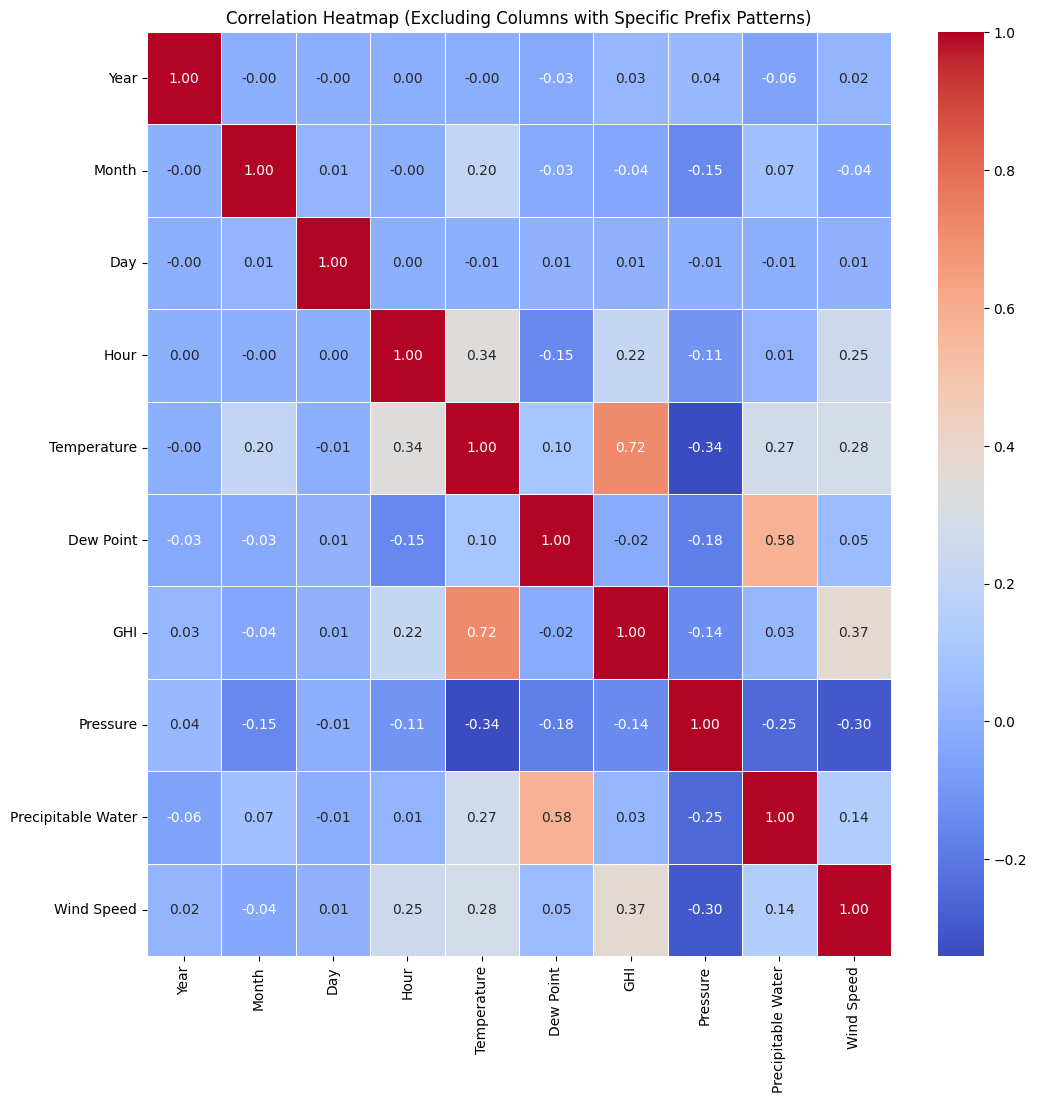

In [30]:
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()


Remove Clear SKY GHI, DNI,DHI and also solar zenith angle as we are using this to calculate the GHI. Even DHI can be removed as we use it in calculating the DHI

In [31]:
solar_ir_df_nondark_encoded
# Dropping the "Clearsky GHI","Clearsky DHI","Clearsky DNI","DHI", 'Solar Zenith Angle'
columns_to_drop = ["Clearsky GHI", "Clearsky DHI", "Clearsky DNI", "DHI", "DNI", "Solar Zenith Angle","Relative Humidity"]
solar_ir_df_nondark_encoded.drop(columns=columns_to_drop, inplace=True)

KeyError: "['Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI', 'Solar Zenith Angle', 'Relative Humidity'] not found in axis"

In [36]:
solar_ir_df_nondark_encoded.head(5)

,Year,Month,Day,Hour,Temperature,Dew Point,GHI,Pressure,Precipitable Water,Wind Speed,...,zipcode_95123,zipcode_95124,zipcode_95125,zipcode_95127,zipcode_95136,zipcode_95148,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
43829,2018,1,1,5,8.7,8.5,0,1020,1.7,0.8,...,0,0,0,0,0,0,0,1,0,0
43830,2018,1,1,6,8.5,8.3,0,1021,1.7,0.7,...,0,0,0,0,0,0,0,1,0,0
43831,2018,1,1,7,9.0,8.1,11,1021,1.7,0.7,...,0,0,0,0,0,0,0,1,0,0
43832,2018,1,1,8,10.6,8.3,88,1021,1.7,0.9,...,0,0,0,0,0,0,0,0,0,1
43833,2018,1,1,9,12.7,8.9,223,1022,1.7,1.2,...,0,0,0,0,0,0,0,0,0,1


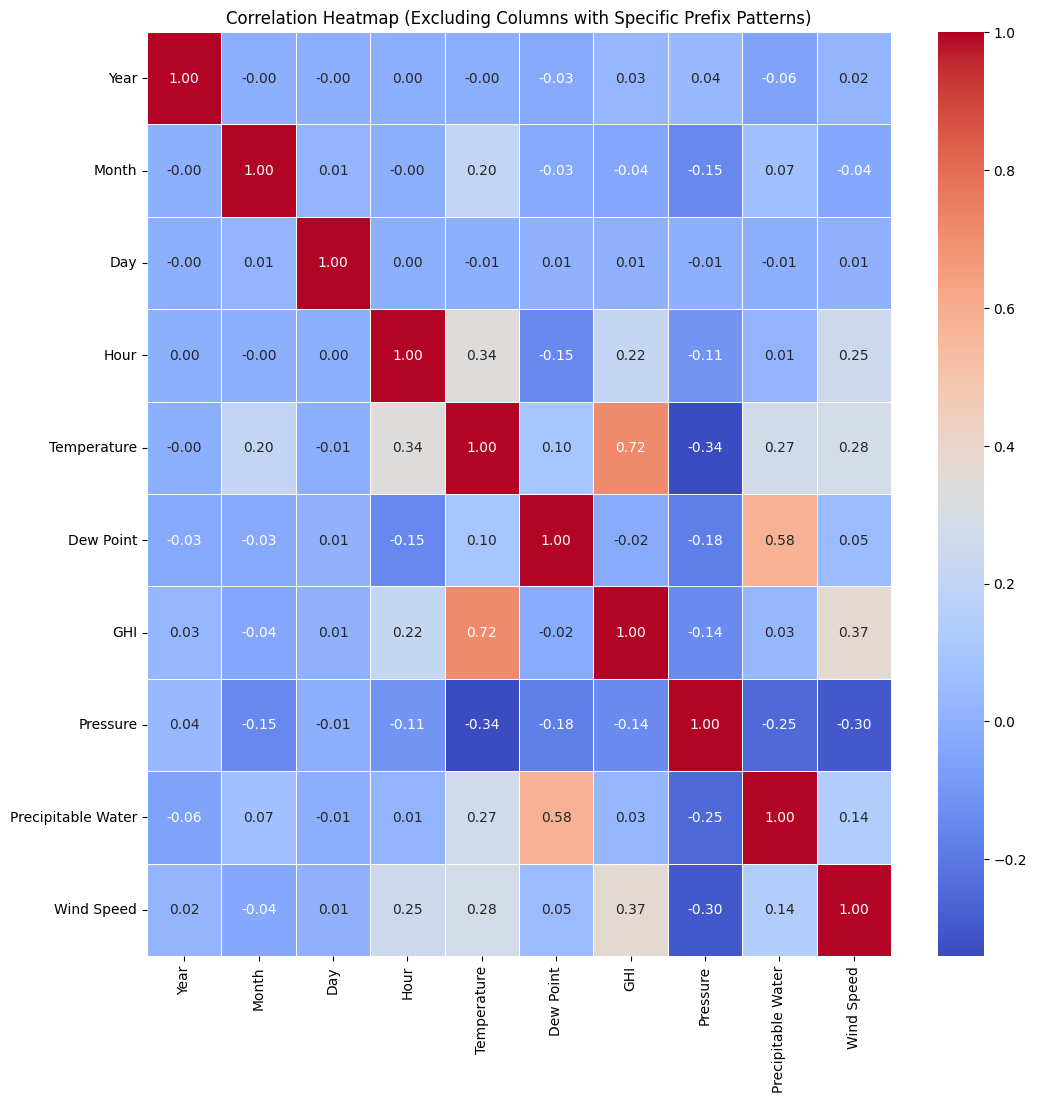

In [32]:
# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()


In [ ]:
# Taking a random sample of 1000 rows for testing
#solar_ir_df_nondark_encoded_sample = solar_ir_df_nondark_encoded.sample(n=1000, replace=False)

In [33]:
# Loading all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
# Filtering data for 2020-2022
solar_ir_df_nondark_encoded_filter = solar_ir_df_nondark_encoded[solar_ir_df_nondark_encoded['Year'] >= 2020]

In [35]:
solar_ir_df_nondark_encoded_filter.shape

(142480, 33)

In [36]:
# Separating features (X) and target variable (y)
X = solar_ir_df_nondark_encoded_filter.drop(columns=['GHI'])
y = solar_ir_df_nondark_encoded_filter['GHI']

In [37]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Modeling - Linear regression

Modeling - Polynomial regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
# Creating polynomial features
degree = 2  # Setting the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initializing and training a Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_poly_train, y_train)

# Making predictions on the testing set
poly_y_pred = poly_model.predict(X_poly_test)

# Calculating evaluation metrics the model
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_rmse = mean_squared_error(y_test, poly_y_pred, squared=False)
poly_mae = mean_absolute_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)

print("Polynomial Regression (Degree {}):".format(degree))
print("Mean Squared Error (MSE) of Polynomial Regression:", poly_mse)
print("Root Mean Squared Error (RMSE) of Polynomial Regression:", poly_rmse)
print("Mean Absolute Error (MAE) of Polynomial Regression:", poly_mae)
print("R-squared (R²) of Polynomial Regression:", poly_r2)

### Modeling - model comparison

In [ ]:
# Creating a dictionary to store the evaluation metrics for each model
regression_evaluation_metrics = {
    'Linear Regression': {'MSE': mlr_mse, 'RMSE': mlr_rmse, 'MAE': mlr_mae, 'R²': mlr_r2},
    'Random Forest Regression base model': {'MSE': rf_mse, 'RMSE': rf_rmse, 'MAE': rf_mae, 'R²': rf_r2},
    #'Random Forest Regression tuned model': {'MSE': best_rf_mse, 'RMSE': best_rf_rmse, 'MAE': best_rf_mae, 'R²': best_rf_r2},
    'Support Vector Machine (SVM) Regression base model': {'MSE': svm_mse, 'RMSE': svm_rmse, 'MAE': svm_mae, 'R²': svm_r2},
    #'SVM Regression tuned model': {'MSE': best_svm_mse, 'RMSE': best_svm_rmse, 'MAE': best_svm_mae, 'R²': best_svm_r2},
    'Polynomial Regression (Degree 2)': {'MSE': poly_mse, 'RMSE': poly_rmse, 'MAE': poly_mae, 'R²': poly_r2}
}

# Converting the dictionary to a DataFrame for better visualization
evaluation_metrics_df = pd.DataFrame.from_dict(regression_evaluation_metrics, orient='index')

# Printing the df
print("Performance Comparison of Different Models:")
print(evaluation_metrics_df)

### Modeling - feature importance and explainability
#### Feature importance of Linear regression

In [ ]:
# Extracting coefficients from the trained linear regression model
lr_coefficients = mlr_model.coef_

# Creating a DataFrame to store feature names and their coefficients
lr_coefficients_df = pd.DataFrame({'Feature': X.columns, 'LR coefficient': lr_coefficients})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_coefficients_df['Absolute_Coefficient'] = lr_coefficients_df['LR coefficient'].abs()
lr_coefficients_df = lr_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_coefficients_df)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Fitting the multiple linear regression model
mlr_model_ols = sm.OLS(y, sm.add_constant(X)).fit()

# Extracting coefficients and p-values from the trained linear regression model
lr_coefficients_ols = mlr_model_ols.params
lr_pvalues_ols = mlr_model_ols.pvalues

# Creating a DataFrame to store feature names, coefficients, and p-values
lr_summary_ols_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),
                              'Coefficient': lr_coefficients_ols,
                              'P-value': lr_pvalues_ols})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_summary_ols_df['Absolute_Coefficient'] = lr_summary_ols_df['Coefficient'].abs()
lr_summary_ols_df = lr_summary_ols_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_summary_ols_df)

# Optional
# Filtering out features with p-value > 0.05 since they're not significant
lr_summary_ols_df_filtered = lr_summary_ols_df[lr_summary_ols_df['P-value'] <= 0.05]
print("\nSignificant Features (p-value <= 0.05):")
print(lr_summary_ols_df_filtered[['Feature', 'Coefficient', 'P-value']])


In [ ]:
import matplotlib.pyplot as plt

# Setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting feature importance from Linear Regression
axes[0].barh(y=lr_summary_ols_df['Feature'], width=lr_summary_ols_df['Absolute_Coefficient'], color='skyblue')
axes[0].set_title('Feature Importance (Linear Regression)')
axes[0].set_xlabel('Absolute Coefficient Value')
axes[0].set_ylabel('Feature')


#### Feature importance of Random Forest

In [ ]:
# Extracting feature importance from the tuned RF model
rf_feature_importance = best_rf_model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance from RF': rf_feature_importance})

# Sorting the DataFrame by importance score in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance from RF', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Random Forest):")
print(rf_importance_df)

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importance from Random Forest
axes[1].barh(y=rf_importance_df['Feature'], width=rf_importance_df['Importance from RF'], color='salmon')
axes[1].set_title('Feature Importance (Random Forest)')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Feature')

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()


## Irradiance to electricity calculation (WIP)

In [ ]:
# Simulation
# Defining constants
panel_area = 1.8  # m²
panel_efficiency = 0.20  # 20%
hours_of_sunlight = 5  # hours
irradiance = 1000  # W/m²

# Step 0: Getting predictions from any existing model (best performing one)
predicted_irradiance = best_rf_y_pred

# Step 1: Calculation of power generation per panel
power_generation_per_panel = predicted_irradiance * panel_area * panel_efficiency

# Step 2: Determination daily energy generation
daily_energy_generation_per_panel = power_generation_per_panel * hours_of_sunlight

# Step 3: Conversion to kilowatt-hours (kWh) - this is power generation in ideal conditions
daily_energy_generation_kwh_per_panel = daily_energy_generation_per_panel / 1000

# Step 4: Consideration of additional factors like system losses
system_losses = 0.1  # assuming 10%
daily_energy_generation_kwh_per_panel_after_losses = daily_energy_generation_kwh_per_panel * (1 - system_losses)

# Results
print("Daily energy generation per panel (kWh) before losses:", daily_energy_generation_kwh_per_panel)
print("Daily energy generation per panel (kWh) after losses:", daily_energy_generation_kwh_per_panel_after_losses)


In [ ]:
# Extrapolating this calculation to street lights use case

# Step 1: Determining the number of street lights
total_street_lights = 1000  # Example: Total number of street lights in the city

# Step 2: Estimating the wattage of street lights
average_wattage_per_light = 150  # Example: Average wattage of street lights in watts

# Step 3: Calculation of daily energy consumption per street light
hours_of_operation_per_day = 10  # Example: Operating hours per day
daily_energy_consumption_per_light = average_wattage_per_light * hours_of_operation_per_day

# Step 4: Calculation of total daily energy consumption
total_daily_energy_consumption = daily_energy_consumption_per_light * total_street_lights

# Step 5: Conversion to kilowatt-hours (kWh)
total_daily_energy_consumption_kwh = total_daily_energy_consumption / 1000

# Step 6: Considering efficiency and losses
efficiency_losses = 0.1  # assuming 10%
total_daily_energy_consumption_kwh_after_losses = total_daily_energy_consumption_kwh * (1 - efficiency_losses)

# Results
print("Total daily energy consumption for street lights (kWh) before losses:", total_daily_energy_consumption_kwh)
print("Total daily energy consumption for street lights (kWh) after losses:", total_daily_energy_consumption_kwh_after_losses)

In [ ]:
# Irradiance estimation for a particular timeframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating Date Range for the Rest of the Year
start_date = '2024-04-20'  # Start date
end_date = '2024-12-31'  # End date
date_range = pd.date_range(start=start_date, end=end_date)

# Listing relevant features for prediction
relevant_features = ['Temperature', 'Pressure', 'Precipitable Water', 'Wind Speed']  # Example relevant features

# Creating a date_column from day, month and year
solar_ir_df_nondark_encoded['date_column'] = pd.to_datetime(solar_ir_df_nondark_encoded[['year', 'month', 'day']])


# Filtering modeling data for the specified date range and extract relevant features
filtered_data = solar_ir_df_nondark_encoded[(solar_ir_df_nondark_encoded['date_column'] >= start_date)
                                            & (solar_ir_df_nondark_encoded['date_column'] <= end_date)]

X_rest_of_year = filtered_data[relevant_features].values

# Predictung Irradiance for Each Day
predicted_irradiance_rest_of_year = best_rf_model.predict(X_rest_of_year)

# Estimating Operation Hours for Streetlights
threshold_irradiance = 200  # Example: Threshold irradiance for street light operation
operation_hours_per_day = np.maximum(predicted_irradiance_rest_of_year - threshold_irradiance, 0)  # Calculate operation hours
operation_hours_per_day_scaled = operation_hours_per_day * 1000  # Scale operation hours for 1000 streetlights

# Visualizing the Results
plt.figure(figsize=(10, 6))
plt.plot(date_range, operation_hours_per_day_scaled, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Operation Hours for 1000 Streetlights')
plt.title('Estimated Operation Hours for 1000 Streetlights per Day')
plt.grid(True)
plt.show()